<a href="https://colab.research.google.com/github/SBrouck/product-analytics-simulator/blob/main/Product_Analytics_Simulator_%E2%80%93_GitHub_Project_Scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Product Analytics Simulator – GitHub Project Scaffold

# -------------------------
# 📁 Project Structure (suggestion)
# -------------------------
# product-analytics-simulator/
# ├── data/                   # Simulated raw data (.csv or .db)
# ├── sql/                    # SQL scripts to query the database
# ├── notebooks/              # Python notebooks for analysis
# ├── visuals/                # Output charts/images
# ├── README.md               # Project overview and results
# └── requirements.txt         # Python dependencies

# -------------------------
# 📦 Step 1 – Simulate an E-commerce dataset
# -------------------------
# Let's simulate a simple transactional database with the following tables:
# - users (user_id, signup_date, location)
# - products (product_id, name, category, price)
# - events (event_id, user_id, product_id, event_type, event_timestamp)
# Event types: 'view', 'cart', 'purchase'

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

np.random.seed(42)

# Simulate users
def generate_users(n=1000):
    signup_dates = [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(n)]
    locations = ['Seattle', 'New York', 'San Francisco', 'Austin', 'Chicago']
    return pd.DataFrame({
        'user_id': range(1, n+1),
        'signup_date': signup_dates,
        'location': np.random.choice(locations, n)
    })

# Simulate products
def generate_products():
    categories = ['Electronics', 'Books', 'Home', 'Clothing']
    products = []
    for i in range(1, 51):
        category = random.choice(categories)
        products.append({
            'product_id': i,
            'name': f"Product_{i}",
            'category': category,
            'price': round(np.random.uniform(10, 300), 2)
        })
    return pd.DataFrame(products)

# Simulate events
def generate_events(users, products, n=10000):
    event_types = ['view', 'cart', 'purchase']
    events = []
    for i in range(1, n+1):
        user = users.sample(1).iloc[0]
        product = products.sample(1).iloc[0]
        timestamp = user.signup_date + timedelta(days=np.random.randint(0, 60), hours=np.random.randint(0, 24))
        events.append({
            'event_id': i,
            'user_id': user.user_id,
            'product_id': product.product_id,
            'event_type': np.random.choice(event_types, p=[0.7, 0.2, 0.1]),
            'event_timestamp': timestamp
        })
    return pd.DataFrame(events)

# Generate and preview
df_users = generate_users()
df_products = generate_products()
df_events = generate_events(df_users, df_products)

import os
os.makedirs("data", exist_ok=True)

# Save to CSV
import os
os.makedirs("data", exist_ok=True)

df_users.to_csv("data/users.csv", index=False)
df_products.to_csv("data/products.csv", index=False)
df_events.to_csv("data/events.csv", index=False)

print("✅ Simulated data saved in /data folder")



✅ Simulated data saved in /data folder



--- DATA SNAPSHOTS ---

Users:
   user_id signup_date       location
0        1  2023-04-13  San Francisco
1        2  2023-12-15  San Francisco
2        3  2023-09-28        Seattle
3        4  2023-04-17       New York
4        5  2023-03-13       New York

Products:
   product_id       name     category   price
0           1  Product_1     Clothing  169.06
1           2  Product_2         Home  182.98
2           3  Product_3         Home  168.25
3           4  Product_4  Electronics  138.88
4           5  Product_5        Books   14.25

Events:
   event_id  user_id  product_id event_type      event_timestamp
0         1      332          10       view  2023-08-22 08:00:00
1         2      130           7       view  2023-08-24 05:00:00
2         3      394          16       view  2024-01-16 23:00:00
3         4      324          40       view  2023-11-20 07:00:00
4         5       91          44       view  2023-03-20 07:00:00


<ipython-input-32-9f10b9940c85>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="event_type", data=events, palette="muted")


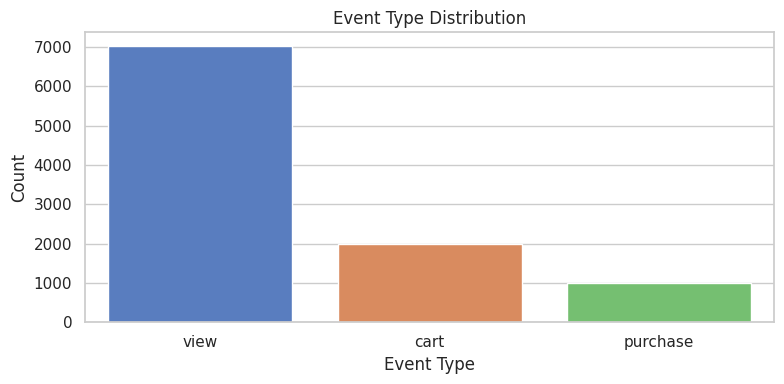

<ipython-input-32-9f10b9940c85>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


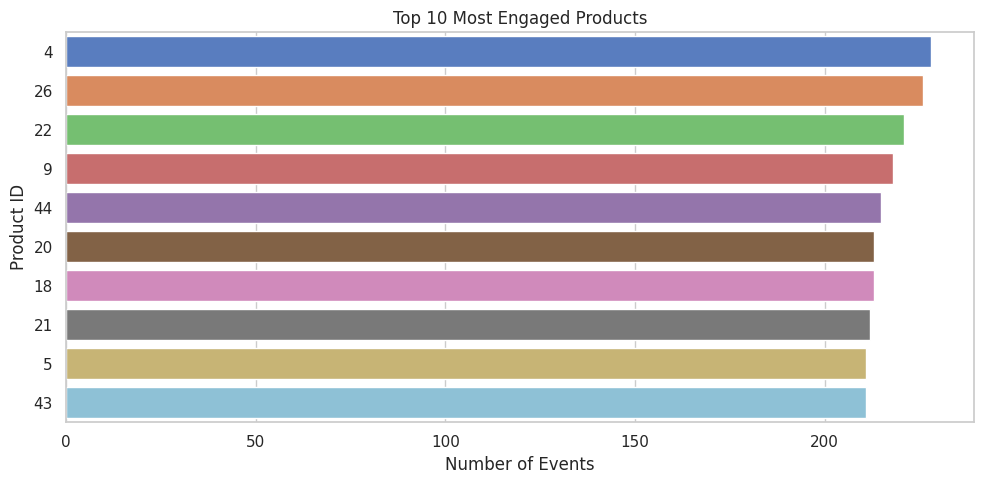

<ipython-input-32-9f10b9940c85>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel_counts.index, y=funnel_counts.values, palette="muted")


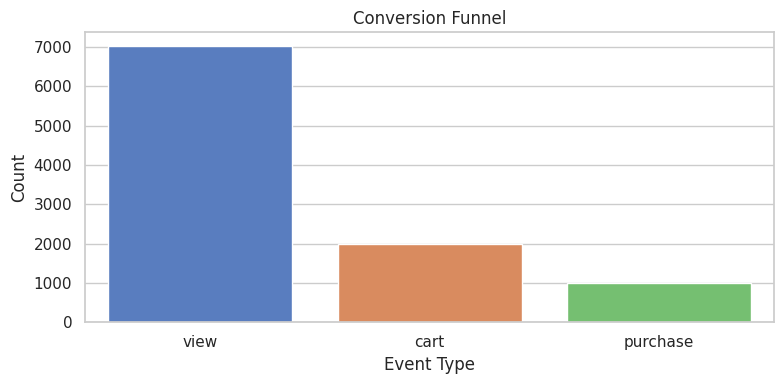

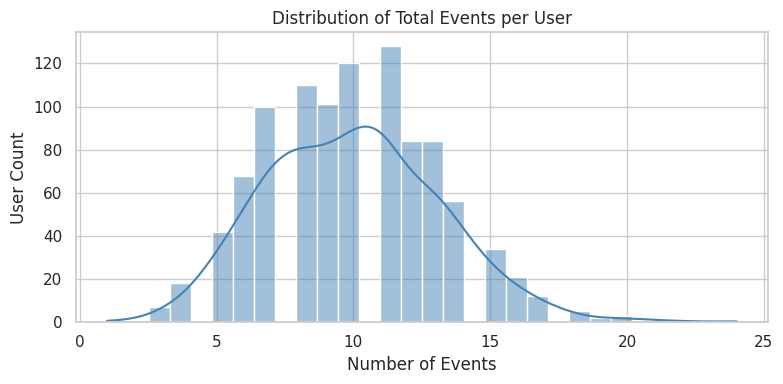

<ipython-input-32-9f10b9940c85>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="muted")


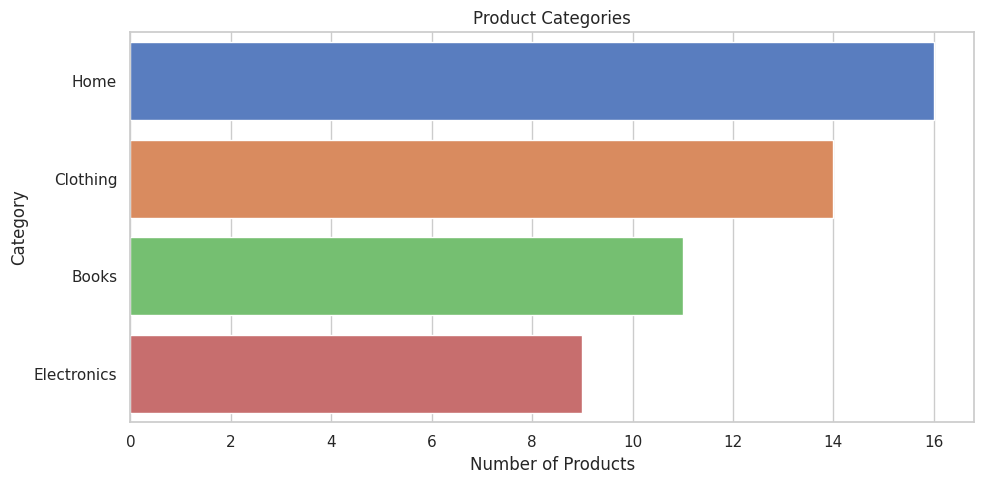

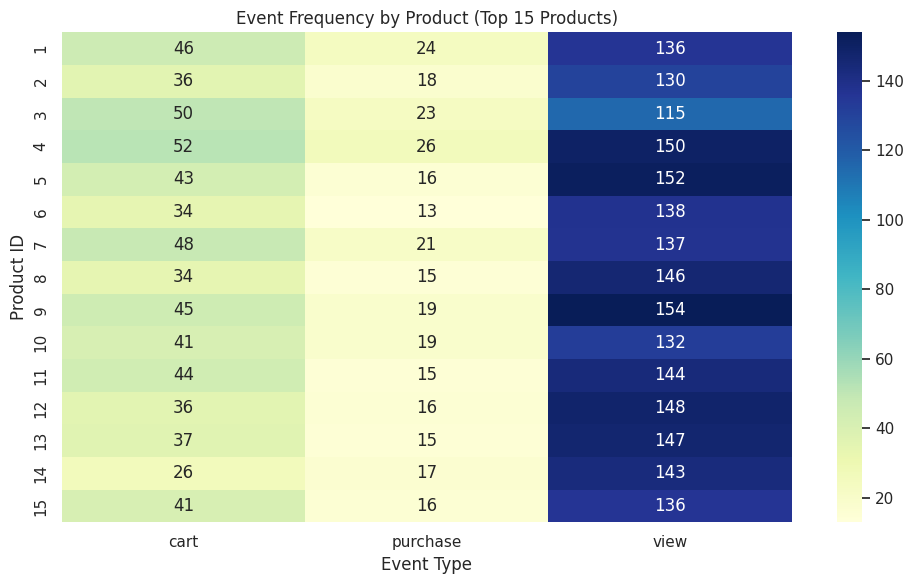


--- USER CLUSTERING WITH K-MEANS ---



<ipython-input-32-9f10b9940c85>:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_features["cluster"], palette="muted")


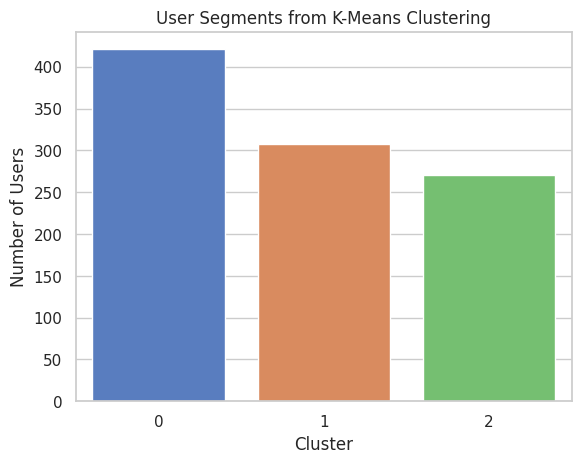


--- CLUSTER PROFILES ---

         view  cart  purchase  total_events
cluster                                    
0         4.8   1.5       0.9           7.1
1         9.3   1.4       0.7          11.4
2         8.0   3.5       1.5          13.0 


--- PRODUCT CATEGORY PREFERENCE BY CLUSTER ---



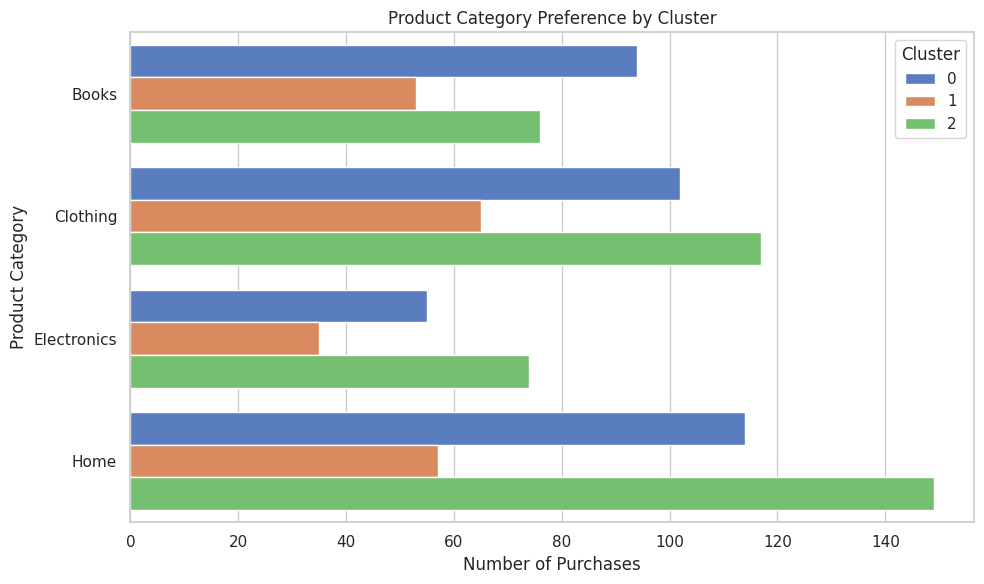


--- TEMPORAL PATTERNS BY CLUSTER ---

No 'timestamp' column available for temporal analysis.


In [32]:
# product_analysis.ipynb

# -----------------------------
# Product Analytics – Exploratory Data Analysis
# -----------------------------

# Objective:
# Explore simulated e-commerce user behavior data using Python.
# The goal is to extract meaningful insights using a realistic structure,
# commonly found in product/data analyst workflows.

# -----------------------------
# 1. Imports and Data Loading
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load CSV files
users = pd.read_csv("data/users.csv")
products = pd.read_csv("data/products.csv")
events = pd.read_csv("data/events.csv")

# -----------------------------
# 2. Initial Exploration
# -----------------------------

print("\n--- DATA SNAPSHOTS ---\n")
print("Users:")
print(users.head())
print("\nProducts:")
print(products.head())
print("\nEvents:")
print(events.head())

# -----------------------------
# 3. Event Type Distribution
# -----------------------------

plt.figure(figsize=(8, 4))
sns.countplot(x="event_type", data=events, palette="muted")
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Top Products by Engagement
# -----------------------------

top_products = events["product_id"].value_counts().head(10).index.tolist()
top_product_names = products[products["product_id"].isin(top_products)]

plt.figure(figsize=(10, 5))
sns.countplot(
    y="product_id",
    data=events[events["product_id"].isin(top_products)],
    order=top_products,
    palette="muted"
)
plt.title("Top 10 Most Engaged Products")
plt.xlabel("Number of Events")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Conversion Funnel
# -----------------------------

event_order = ["view", "cart", "purchase"]
funnel_counts = events["event_type"].value_counts().reindex(event_order)

plt.figure(figsize=(8, 4))
sns.barplot(x=funnel_counts.index, y=funnel_counts.values, palette="muted")
plt.title("Conversion Funnel")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Average Event Per User
# -----------------------------

user_event_counts = events.groupby("user_id")["event_type"].count()

plt.figure(figsize=(8, 4))
sns.histplot(user_event_counts, bins=30, kde=True, color="steelblue")
plt.title("Distribution of Total Events per User")
plt.xlabel("Number of Events")
plt.ylabel("User Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 7. Product Category Analysis
# -----------------------------

category_counts = products["category"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="muted")
plt.title("Product Categories")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Heatmap of Event Frequency
# -----------------------------

event_matrix = pd.crosstab(events["product_id"], events["event_type"])
plt.figure(figsize=(10, 6))
sns.heatmap(event_matrix.head(15), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Event Frequency by Product (Top 15 Products)")
plt.xlabel("Event Type")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

# -----------------------------
# 9. User Clustering (K-Means)
# -----------------------------

print("\n--- USER CLUSTERING WITH K-MEANS ---\n")

# Step 1: Feature engineering per user
user_features = events.groupby("user_id").event_type.value_counts().unstack(fill_value=0)
user_features = user_features.merge(users.set_index("user_id"), left_index=True, right_index=True)

# Keep only numeric columns for event types to avoid mixing with string data
numeric_event_cols = [col for col in ["view", "cart", "purchase"] if col in user_features.columns]
user_features["total_events"] = user_features[numeric_event_cols].sum(axis=1)

# Step 2: Select features for clustering
features_for_clustering = user_features[numeric_event_cols + ["total_events"]]

# Step 3: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# Step 4: K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_features["cluster"] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize cluster sizes
sns.countplot(x=user_features["cluster"], palette="muted")
plt.title("User Segments from K-Means Clustering")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.show()

# Step 6: Cluster profiling (summary stats)
print("\n--- CLUSTER PROFILES ---\n")
cluster_summary = user_features.groupby("cluster")[numeric_event_cols + ["total_events"]].mean().round(1)
print(cluster_summary, "\n")

# -----------------------------
# 10. Product Preference by Cluster
# -----------------------------

print("\n--- PRODUCT CATEGORY PREFERENCE BY CLUSTER ---\n")

# Merge events with clusters and product category
events_with_cluster = events.merge(user_features[["cluster"]], on="user_id")
events_with_cluster = events_with_cluster.merge(products[["product_id", "category"]], on="product_id")

# Check if 'timestamp' column exists in events before merging
if "timestamp" in events.columns:
    events_with_cluster = events_with_cluster.merge(events[["event_id", "timestamp"]], on="event_id", how="left")
else:
    print("Warning: 'timestamp' column not found in events.csv")

# Focus on purchase events only
purchase_by_cluster = events_with_cluster[events_with_cluster["event_type"] == "purchase"]

# Count purchases per cluster/category
cluster_cat_counts = purchase_by_cluster.groupby(["cluster", "category"]).size().reset_index(name="purchases")

# Plot preference per cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_cat_counts,
    x="purchases",
    y="category",
    hue="cluster",
    palette="muted"
)
plt.title("Product Category Preference by Cluster")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Category")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# -----------------------------

